<h3>USFWS Pea Island Plot Group 6 Biol Counts - 2020 ReBuild</h4>

**Supports:**

dates=['2014-07-14 00:00:00','2014-07-15 00:00:00','2014-09-29 00:00:00','2015-04-28 00:00:00','2015-08-04 00:00:00','2015-10-20 00:00:00','2016-02-17 00:00:00','2016-05-10 00:00:00','2016-08-09 00:00:00','2016-10-13 00:00:00']

surveys=[201407,201407,201409,201504,201508,201510,201602,201605,201608,201610]

<br />
**Instructions for use:**
1. Export the table Biological Counts from the master geodatabase PIBM_Master.accdb to a tab separated text file. Title it PeaIsland_BioCounts.txt. If you elect to use a different name, be sure to make the change in the user inputs cell, below, to reflect. Too, If you should choose to export using a field separator other than the tab (x09) you'll have to update the Load Data File cell. 
2. Check the User Inputs cell, ensuring that the path and name of the exported bioCounts source file is correct. 
3. Cell -> Run All

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import datetime

%matplotlib inline

**Function PlotCountsAboveBars**
Places (prints) the total value count for each "critter" atop the transect bar (aggregated for cntrol and treatment separately) in the bio count barplots. The function is called by each of the plot operations in the Plotting Section of this notebook.

In [101]:
# Function: PlotCountsAboveBars   NOT CURRENTLY USED
def PlotCountsAboveBars():
    # Get current axis on current figure
    ax = plt.gca()

    # Iterate through the list of axes' patches
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

In [102]:
### User Inputs:
datapath='../data/'
fns=['PINWR_JAN2020_BioCnts.xlsx','PINWR_APR2020_BioCnts.xlsx',
    'PINWR_Jul2020_BioCnts.xlsx'] #'PeaIsland_BioCounts.txt'

surveys=['202001','202004','202007']

plotpath='../plots_n_graphics/PlotGroup6_Bio/'

In [103]:
# Load data from Excel spreadsheet:

df = pd.DataFrame(columns=['sheet_code','transect_ID','sample_ID','ghost_crab_cnt',
                                      'sm_mole_crab_cnt','md_mole_crab_cnt','lg_mole_crab_cnt',
                                      'coquina_cnt','worm_cnt','amphipod_cnt'])
try:
    for survey, fn in zip(surveys, fns):
        df_ = pd.read_excel(datapath+fn)

        df_.replace('NR', np.nan, inplace=True)
        df_.dropna()

        df_g = df_.groupby(['transect_ID'], as_index=False).sum()
        df_g['survey'] = survey
        df = pd.concat([df,df_g], ignore_index=True)
except Exception as e:
    print('Oops', e)

# drop columns that we don't need, just to tidy things up a bit...
df.drop(['sheet_code', 'sample_ID'], axis=1, inplace=True)

# create and populate new group column (field) based on transect id 
# type (e.g., control or transect):
df.loc[df['transect_ID'].str[0] == 'C', 'group'] ='control'
df.loc[df['transect_ID'].str[0] =='T', 'group'] = 'treatment'

try:
    df.drop(['NOTES'], axis=1, inplace=True)
except Exception as e:
    print('No NOTES field to drop...')

df

No NOTES field to drop...


,transect_ID,ghost_crab_cnt,sm_mole_crab_cnt,md_mole_crab_cnt,lg_mole_crab_cnt,coquina_cnt,worm_cnt,amphipod_cnt,survey,group
0,C01,0,0,1,0,0,0,0,202001,control
1,C02,0,0,0,0,0,0,0,202001,control
2,C03,0,0,0,0,0,0,0,202001,control
3,C04,0,0,1,0,0,0,0,202001,control
4,C05,0,0,1,1,0,0,0,202001,control
...,...,...,...,...,...,...,...,...,...,...
76,T12,14,19,6,0,0,0,0,202007,treatment
77,T13,0,11,7,0,0,0,0,202007,treatment
78,T14,2,28,3,2,0,0,0,202007,treatment
79,T15,0,0,0,0,0,0,0,202007,treatment


<h3>Plotting Section</h3>

In [104]:
### some general settings, common to all plots...
sns.set_color_codes("pastel")
sns.despine(offset=10, trim=True);

<Figure size 432x288 with 0 Axes>

**Ghost Crabs**

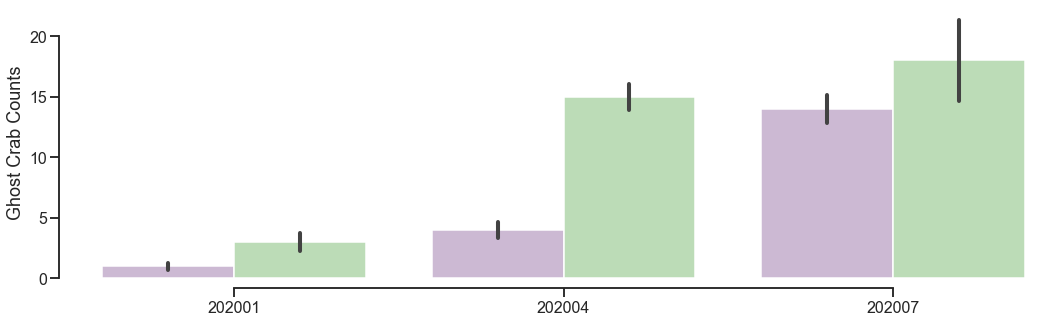

In [105]:
sns.set(style="ticks")
sns.set_context('talk')
g = sns.catplot(x="survey", y="ghost_crab_cnt", hue="group", data=df,
                    height=5, aspect=3, estimator=np.sum, ci='sd', kind="bar", 
                   hue_order=['control','treatment'], legend=False, palette="PRGn")
# ci=95,
###"PRGn"
sns.despine(offset=10, trim=True) 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Ghost Crab Counts")

# to place the field counts for coquina clams recorded during each of the 12 sampling events
#PlotCountsAboveBars()
plt.savefig(plotpath+'Ghost_Crab_counts.jpg', dpi=300);

**Small Mole Crabs**

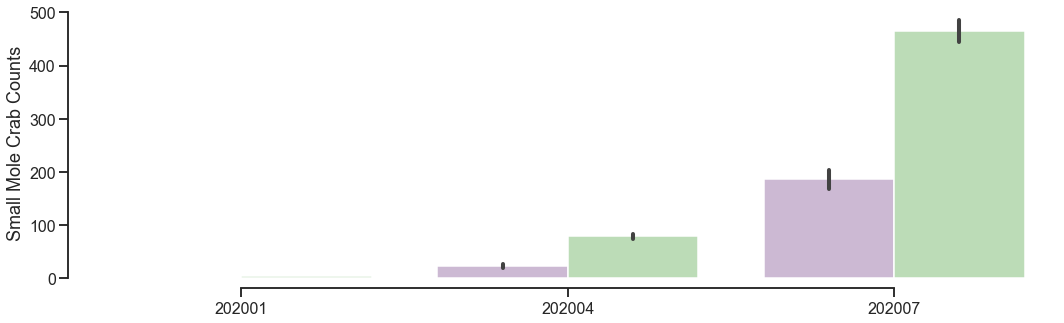

In [106]:
sns.set(style="ticks")
sns.set_context('talk')

g = sns.catplot(x="survey", y="sm_mole_crab_cnt", hue="group", data=df,
                    height=5, aspect=3, estimator=np.sum, kind="bar", 
                   hue_order=['control','treatment'], ci='sd', legend=False, palette="PRGn")
sns.despine(offset=10, trim=True) 

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Small Mole Crab Counts")

# to place the field counts for coquina clams recorded during each of the 12 sampling events
#PlotCountsAboveBars()
plt.savefig(plotpath+'Sm_Mole_Crab_counts.jpg', dpi=300)

**Medium Mole Crabs**

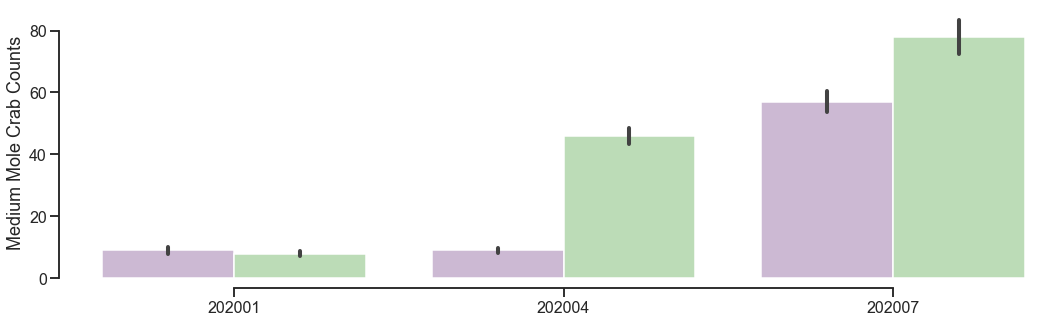

In [107]:
sns.set(style="ticks")
sns.set_context('talk')
g = sns.catplot(x="survey", y="md_mole_crab_cnt", hue="group", data=df,
                    height=5, aspect=3, estimator=np.sum, kind="bar", 
                   hue_order=['control','treatment'], ci='sd', legend=False, palette="PRGn")
sns.despine(offset=10, trim=True) 

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Medium Mole Crab Counts")

# to place the field counts for coquina clams recorded during each of the 12 sampling events
#PlotCountsAboveBars()

plt.savefig(plotpath+'Med_Mole_Crab_counts.jpg', dpi=300)

**Large Mole Crabs**

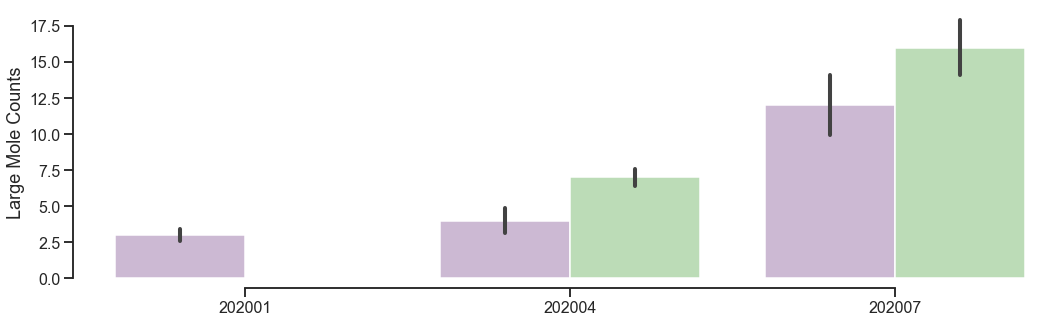

In [108]:
sns.set(style="ticks")
sns.set_context('talk')
g = sns.catplot(x="survey", y="lg_mole_crab_cnt", hue="group", data=df,
                    height=5, aspect=3, estimator=np.sum, kind="bar", 
                   hue_order=['control','treatment'], ci='sd', legend=False, palette="PRGn")
sns.despine(offset=10, trim=True) 

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Large Mole Counts")

# to place the field counts for coquina clams recorded during each of the 12 sampling events
#PlotCountsAboveBars()
plt.savefig(plotpath+'Lg_Mole_Crab_counts.jpg', dpi=300)

**Coquina Clams**

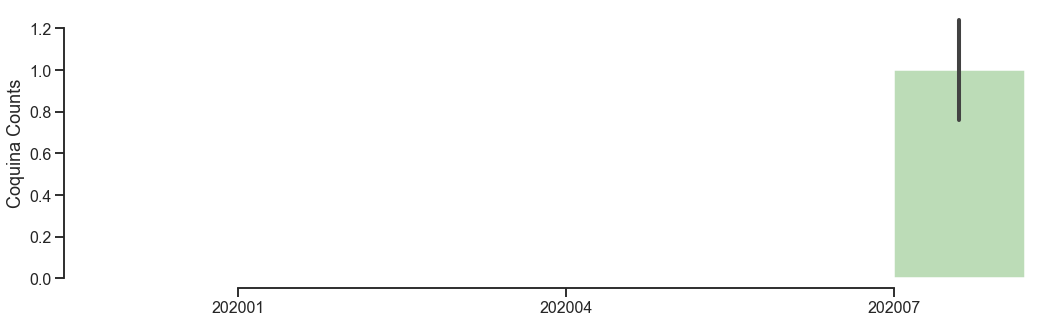

In [109]:
sns.set(style="ticks")
sns.set_context('talk')
g = sns.catplot(x="survey", y="coquina_cnt", hue="group", data=df,
                    height=5, aspect=3, estimator=np.sum, kind="bar", 
                   hue_order=['control','treatment'], ci='sd', legend=False, palette="PRGn")
sns.despine(offset=10, trim=True) 

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Coquina Counts")

# to place the field counts for coquina clams recorded during each of the 12 sampling events
#PlotCountsAboveBars()

plt.savefig(plotpath+'Coquina_counts.jpg', dpi=300)

**Amphipods**

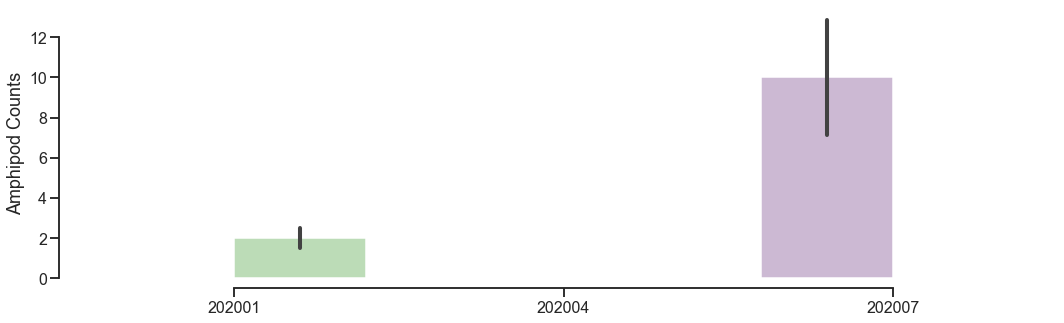

In [110]:
sns.set(style="ticks")
sns.set_context('talk')
g = sns.catplot(x="survey", y="amphipod_cnt", hue="group", data=df,
                    height=5, aspect=3, estimator=np.sum, kind="bar", 
                   hue_order=['control','treatment'], ci='sd', legend=False, palette="PRGn")
sns.despine(offset=10, trim=True) 

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels("", "Amphipod Counts")

# to place the field counts for amphipods recorded during each of the 12 sampling events
#PlotCountsAboveBars()

plt.savefig(plotpath+'amphipod_counts.jpg', dpi=300)

**Polychaete Worms**

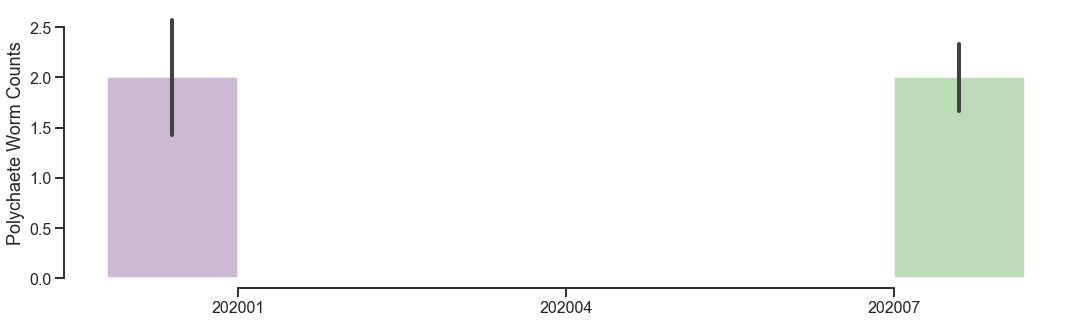

In [111]:
#figpg = plt.figure(figsize=(15,5))
#axspg = figpg.add_subplot(1,1,1)
#figpg.tight_layout(pad=5.1, w_pad=0.5, h_pad=2.0)

sns.set(style="ticks")
sns.set_context('talk')
#sns.set_color_codes("pastel")
g = sns.catplot(x="survey", y="worm_cnt", hue="group", data=df, height=5, aspect=3, 
                    kind="bar", hue_order=['control','treatment'], 
                   estimator=np.sum, ci='sd', legend=False, palette="PRGn")  
#axb = sns.barplot(x="survey", y="worms", hue="group", data=df, palette="PRGn")  
sns.despine(offset=10, trim=True) 

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
g.set_axis_labels('',"Polychaete Worm Counts")
#g.set_ylabel("Polychaete Mean Counts", fontsize=16)     
#g.legend_.remove()

# to place the field counts for polychaete worms recorded during each of the 12 sampling events
#PlotCountsAboveBars()

plt.savefig(plotpath+'polychaete_counts.jpg', dpi=300)     

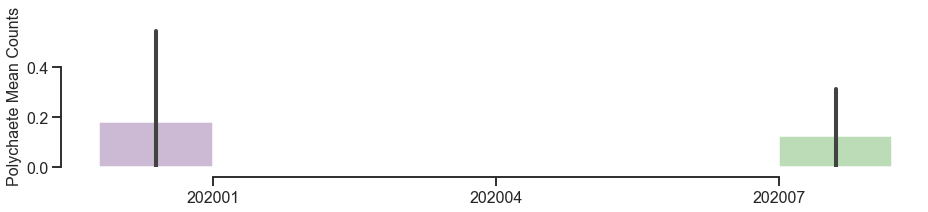

In [112]:
### Bar plot means with 95% CI  Draws mean value bars. This has been, for now anyway, 
### superceded by the counts plot code in the cell above...

figpg = plt.figure(figsize=(15,5))
axspg = figpg.add_subplot(1,1,1)
figpg.tight_layout(pad=5.1, w_pad=0.5, h_pad=2.0)

sns.set_color_codes("pastel")
axb = sns.barplot(x="survey", y="worm_cnt", hue="group", data=df, palette="PRGn")     
sns.despine(offset=10, trim=True)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
axb.set_xlabel('')
axb.set_ylabel("Polychaete Mean Counts", fontsize=16)     
axb.legend_.remove()

plt.savefig(plotpath+'Sample_Polychaete_means.jpg', dpi=300)

**The End**